# Machine Learning

## Defining performance metrics.

In [33]:
from sklearn.metrics import confusion_matrix, f1_score

def evaluate_model_performance(y_true, y_pred):
    """
    Compute the F1 score (micro) using the confusion matrix to evaluate the model performance.
    
    Parameters:
    - y_true: true labels
    - y_pred: predicted labels
    
    Returns:
    - f1_micro: F1 score (micro)
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Compute F1 score (micro)
    f1_micro = f1_score(y_true, y_pred, average='micro')
    
    print("Confusion Matrix:")
    print(cm)
    print("\nF1 Score (Micro): {:.4f}".format(f1_micro))
    
    return f1_micro

## Defining function for confusion matrix

In [34]:
def make_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='plasma', 
                xticklabels=['Low', 'Medium Low', 'Medium High', 'High'],
                yticklabels=['Low', 'Medium Low', 'Medium High', 'High'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for {}'.format(title))
    plt.show()

## Model 1: Decision Tree

In [35]:
from sklearn.model_selection import KFold, cross_val_score

model_tree = DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train, y_train)

kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
scores_tree = cross_val_score(model_tree, X_train, y_train, scoring="f1_micro", cv=kfold)
result_tree = scores_tree.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_tree))

Average F1 Score (Micro) for Decision Tree is : 0.41039795715166905


In [36]:
#Fit the Model
from sklearn.metrics import classification_report
    
prediction = model_tree.predict(X_test)
train_prediction = model_tree.predict(X_train)

print(classification_report(y_test, prediction))
train_score = f1_score(y_train, train_prediction, average='micro')
score_dt = f1_score(y_test, prediction, average='micro')
print('Train F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(train_score))
print('Test F1 Score (Micro) for Decision Tree Algorithm is : {}'.format(score_dt))

              precision    recall  f1-score   support

           0       0.51      0.38      0.43       447
           1       0.39      0.44      0.41       670
           2       0.38      0.52      0.44       688
           3       0.47      0.24      0.32       465

    accuracy                           0.41      2270
   macro avg       0.44      0.39      0.40      2270
weighted avg       0.43      0.41      0.40      2270

Train F1 Score (Micro) for Decision Tree Algorithm is : 0.42207291551933035
Test F1 Score (Micro) for Decision Tree Algorithm is : 0.4105726872246696


In [37]:
train_f1_tree = evaluate_model_performance(y_train, train_prediction)

Confusion Matrix:
[[ 736  697  432   29]
 [ 281 1228  973  185]
 [ 209  768 1476  264]
 [  42  444  923  392]]

F1 Score (Micro): 0.4221


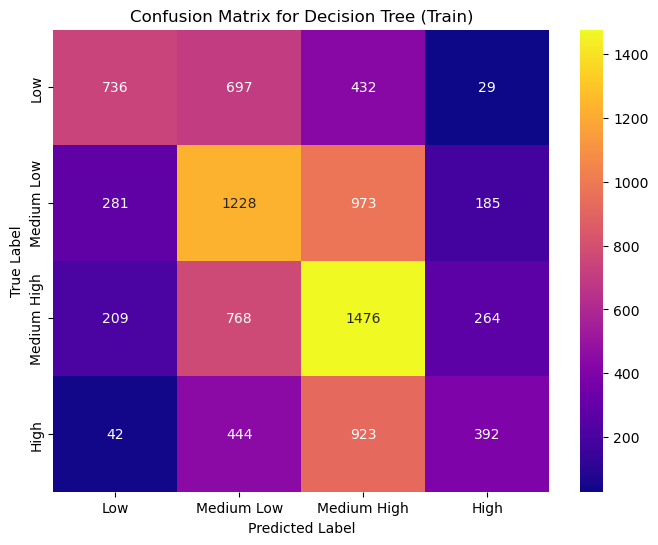

In [38]:
make_confusion_matrix(y_train, train_prediction, 'Decision Tree (Train)')

In [39]:
test_f1_tree = evaluate_model_performance(y_test, prediction)

Confusion Matrix:
[[170 164 103  10]
 [ 97 293 231  49]
 [ 55 207 358  68]
 [ 13  94 247 111]]

F1 Score (Micro): 0.4106


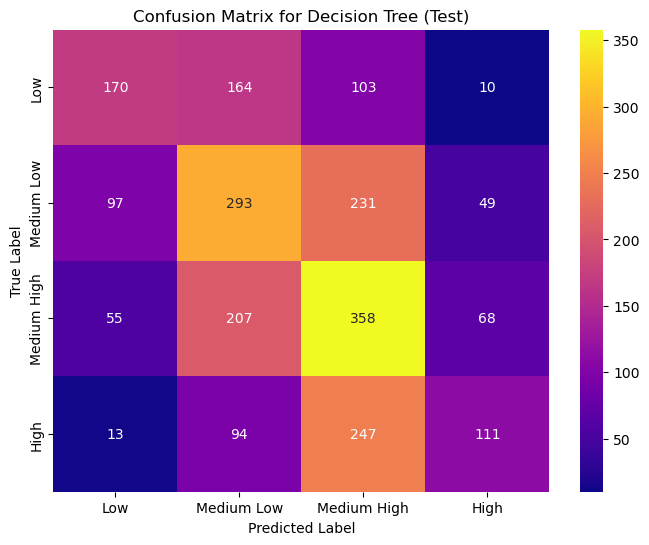

In [40]:
make_confusion_matrix(y_test, prediction, 'Decision Tree (Test)')

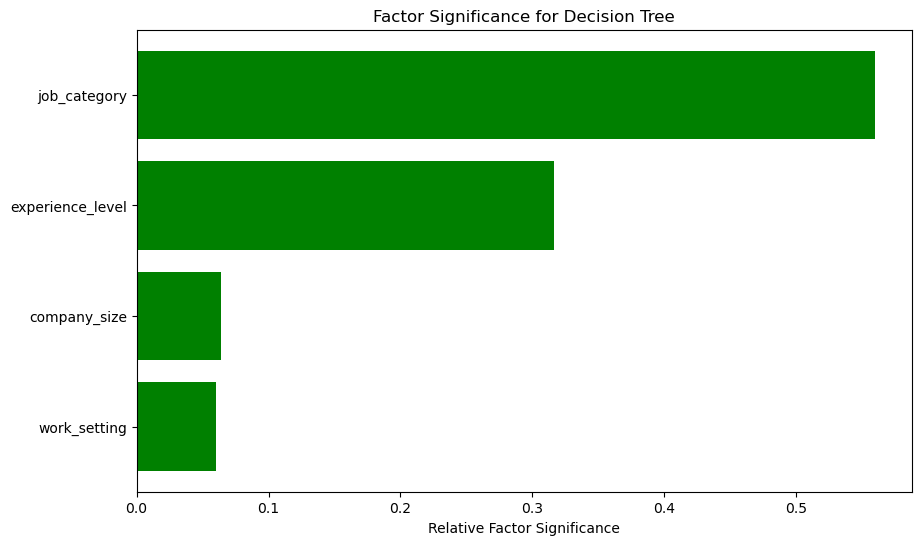

In [41]:
factors = X.columns
importances = model_tree.feature_importances_
indices = np.argsort(importances)[::1]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices[-10:])), importances[indices], color='g', align='center')
plt.yticks(range(len(indices[-10:])), factors[indices])
plt.xlabel('Relative Factor Significance')
plt.title('Factor Significance for Decision Tree')
plt.show()

## Model 2: Extreme Gradient Boosting (XGB)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBClassifier

# Encode categorical columns
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Train XGBoost model
model_xgb = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
model_xgb.fit(X_train_encoded, y_train)

# Find F1 Score
kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
scores_xgb = cross_val_score(model_xgb, X_train_encoded, y_train, scoring="f1_micro", cv=kfold)
result_xgb = scores_xgb.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_xgb))

Average F1 Score (Micro) for Decision Tree is : 0.4108384857860304


In [43]:
# Predict on train and test data
train_pred_xgb = model_xgb.predict(X_train_encoded)
pred_xgb = model_xgb.predict(X_test_encoded)

# Print classification report
print("Classification Report for Extreme Gradient Boosting:")
print(classification_report(y_test, pred_xgb))

# Compute and print F1 scores
train_score_xgb = f1_score(y_train, train_pred_xgb, average='micro')
score_xgb = f1_score(y_test, pred_xgb, average='micro')

print('Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {:.4f}'.format(train_score_xgb))
print('Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : {:.4f}'.format(score_xgb))

Classification Report for Extreme Gradient Boosting:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       447
           1       0.39      0.44      0.41       670
           2       0.38      0.52      0.44       688
           3       0.46      0.24      0.31       465

    accuracy                           0.41      2270
   macro avg       0.44      0.39      0.40      2270
weighted avg       0.43      0.41      0.41      2270

Train F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.4221
Test F1 Score (Micro) for Extreme Gradient Boosting Algorithm is : 0.4115


In [44]:
train_f1_xgb = evaluate_model_performance(y_train, train_pred_xgb)

Confusion Matrix:
[[ 733  697  433   31]
 [ 279 1227  973  188]
 [ 207  768 1477  265]
 [  42  441  923  395]]

F1 Score (Micro): 0.4221


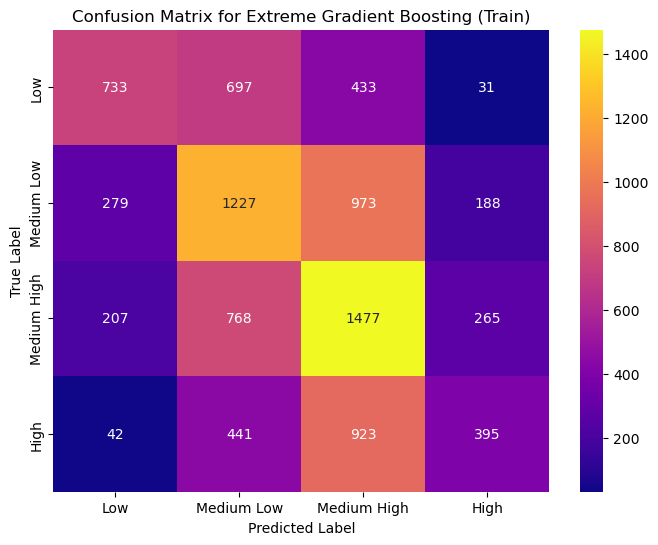

In [45]:
make_confusion_matrix(y_train, train_pred_xgb, 'Extreme Gradient Boosting (Train)')

In [46]:
test_f1_xgb = evaluate_model_performance(y_test, pred_xgb)

Confusion Matrix:
[[169 163 103  12]
 [ 92 296 232  50]
 [ 54 208 358  68]
 [ 13  94 247 111]]

F1 Score (Micro): 0.4115


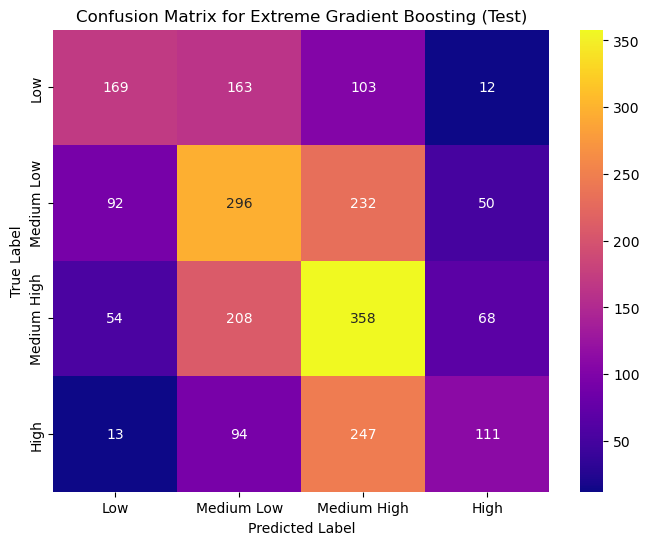

In [47]:
make_confusion_matrix(y_test, pred_xgb, 'Extreme Gradient Boosting (Test)')

<Figure size 1200x800 with 0 Axes>

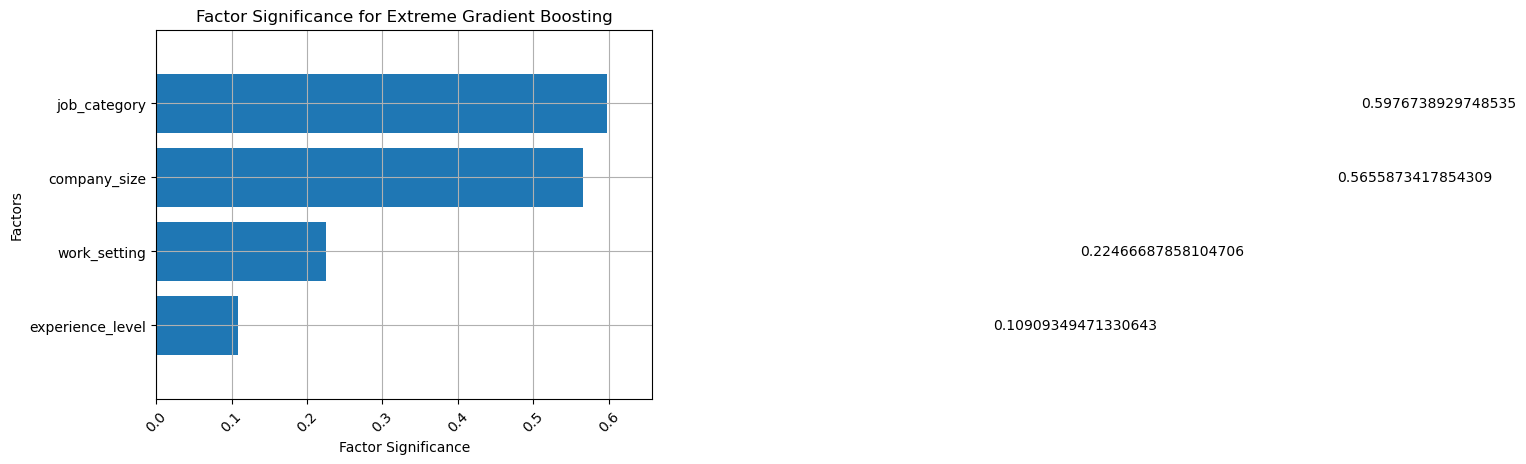

In [48]:
# Plot factor significance
import xgboost as xgb

plt.figure(figsize=(12, 8))
xgb.plot_importance(model_xgb, importance_type='gain', max_num_features=10, height=0.8, xlabel='Factor Significance', ylabel='Factors', title='Factor Significance for Extreme Gradient Boosting')
plt.xticks(rotation=45)
plt.yticks(range(len(factors)), factors)
plt.show()

## Model 3: Random Forest

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix


# Model Creation and Training
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

kfold = KFold(n_splits=10, random_state = 0, shuffle=True)
scores_rf = cross_val_score(model_rf, X_train, y_train, scoring="f1_micro", cv=kfold)
result_rf = scores_rf.mean()
print('Average F1 Score (Micro) for Decision Tree is : {}'.format(result_rf))

Average F1 Score (Micro) for Decision Tree is : 0.4106182214688497


In [52]:
#Prediction
y_pred = model_rf.predict(X_test)
test_f1_rf = evaluate_model_performance(y_test, y_pred)

Confusion Matrix:
[[170 162 103  12]
 [ 94 292 234  50]
 [ 55 207 358  68]
 [ 13  94 247 111]]

F1 Score (Micro): 0.4101


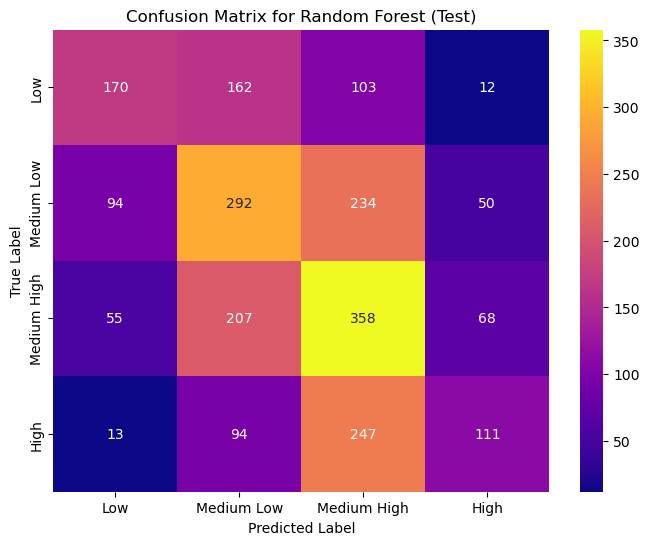

In [53]:
make_confusion_matrix(y_test, y_pred, 'Random Forest (Test)')

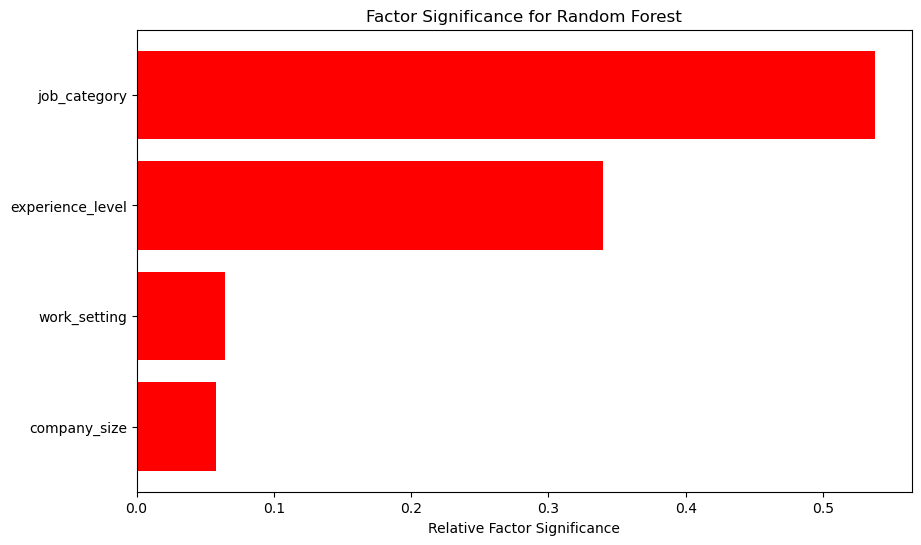

In [54]:
importance = model_rf.feature_importances_
indices = np.argsort(importance)[::1]
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(len(indices[-10:])), importance[indices], color='r', align='center')
plt.yticks(range(len(indices[-10:])), factors[indices])
plt.xlabel('Relative Factor Significance')
plt.title('Factor Significance for Random Forest')
plt.show()